<a href="https://colab.research.google.com/github/JonasSouza871/Estatistica_python/blob/main/Testando_rela%C3%A7%C3%B5es_e_prevendo_resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Análise preliminares

--------------------------------

## 1.1. Conhecendo o dataset


-----------------

- importando as bibliotecas

In [223]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

- Dataset que será utilizado: Consumo de cerveja na cidade de São Paulo

- Link do dataset com as informações : https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo

- Dados do dataset:

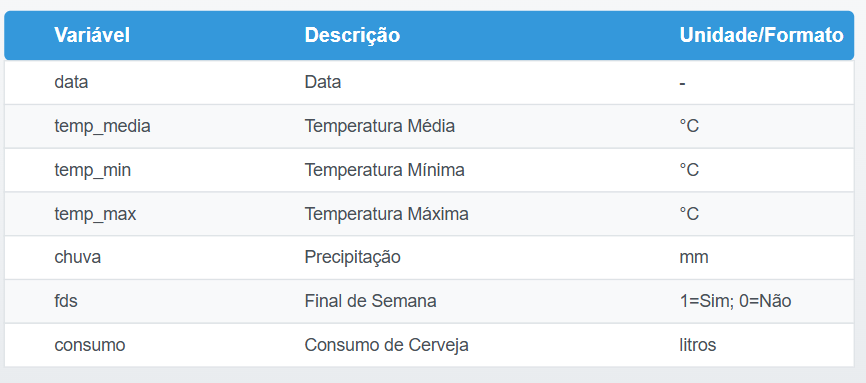

In [224]:
dados = pd.read_csv('Consumo_cerveja.csv')
dados.head()

,data;temp_media;temp_min;temp_max;chuva;fds;consumo
0,01/01/2015;27.3;23.9;32.5;0;0;25461
1,02/01/2015;27.02;24.5;33.5;0;0;28972
2,03/01/2015;24.82;22.4;29.9;0;1;30814
3,04/01/2015;23.98;21.5;28.6;1.2;1;29799
4,05/01/2015;23.82;21;28.3;0;0;28900


- vemos um problema nos dados pois esta utilizando , (comum aqui no brasil) porém não utilizado fora, e a linguagem tambem não interpreta isso como decimal. Além de que os dados tambem estao separado por ;

In [225]:
dados = pd.read_csv('Consumo_cerveja.csv',sep = ';') #organizado
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [226]:
dados.shape #quantidade de linhas (365 dias)
# quantidade de colunas, tipos de dados mostrado na tabela SVG acima

(365, 7)

## 1.2. Análise preliminares

--------------

In [227]:
dados.describe()# informação sobre os dados

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


- Aplicando a matriz de correlação, iremos obter o coeficiente de correlação que indica o qual associado linearmente estão dois termos

- Eliminado a data do dataset:

In [228]:
dados = dados.drop('data',axis = 1)
dados.head()

,temp_media,temp_min,temp_max,chuva,fds,consumo
0,27.30,23.9,32.5,0.0,0,25461
1,27.02,24.5,33.5,0.0,0,28972
2,24.82,22.4,29.9,0.0,1,30814
3,23.98,21.5,28.6,1.2,1,29799
4,23.82,21.0,28.3,0.0,0,28900


In [229]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


- vemos uma boa relação linear entre cosumo e a temperatura máxima e tambem fim de semana.

- Temperatura máxima e consumo tem uma alta releção linear

# 2. Comportamento da variável dependente

----

## 2.1. Comportamente da variável dependente

------------

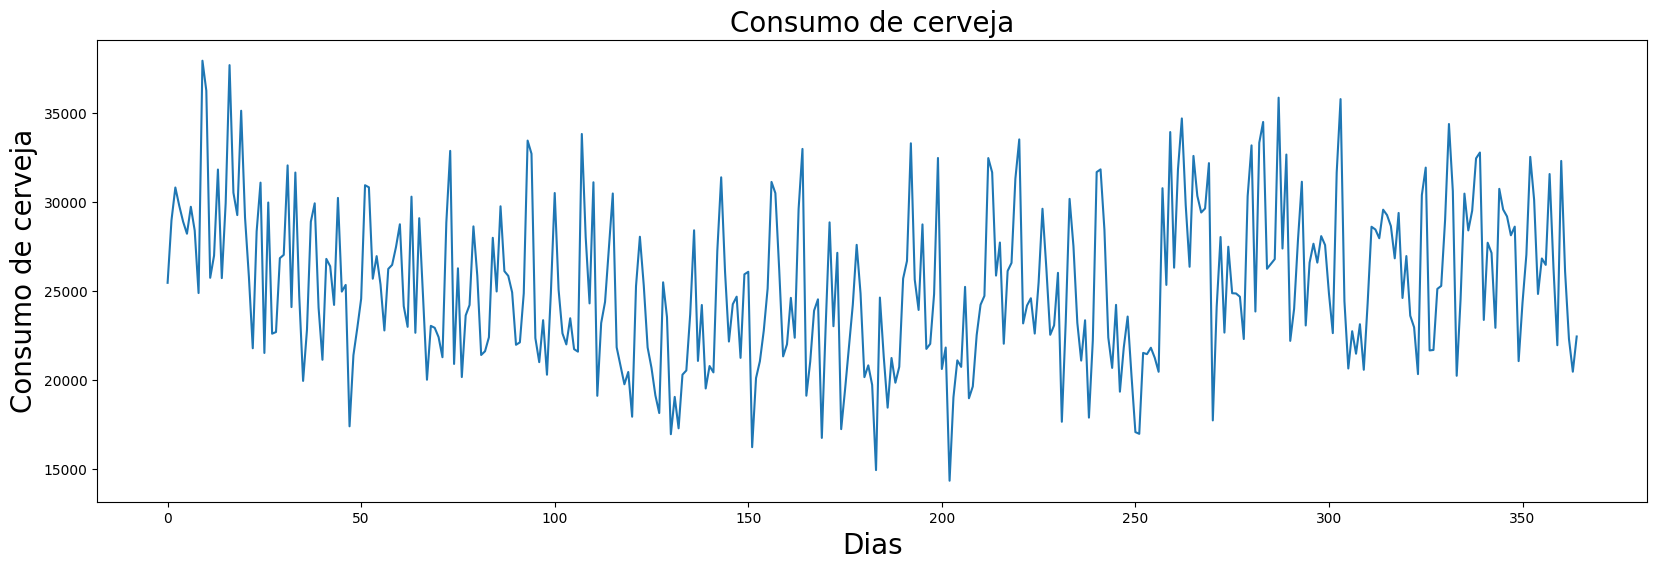

In [230]:
fig,  ax = plt.subplots(figsize=(20,6)) #tamanho da figura

ax = dados['consumo'].plot() ##plot
ax.set_ylabel('Consumo de cerveja',fontsize = 20)
ax.set_xlabel('Dias',fontsize = 20)
ax.set_title('Consumo de cerveja', fontsize = 20)
plt.show()

## 2.2. Utilizando boxplot

-----

- O boxplot é um gráfico estatístico que visualiza a distribuição de dados numéricos através de cinco medidas essenciais: mínimo, primeiro quartil (Q1), mediana (Q2), terceiro quartil (Q3) e máximo, onde a caixa central representa o intervalo interquartil (contendo 50% dos dados centrais) com uma linha interna marcando a mediana, enquanto os bigodes se estendem até os valores não atípicos dentro de 1,5 vezes o intervalo interquartil, e pontos isolados fora desses limites indicam outliers, valores que se desviam significativamente do padrão da distribuição.

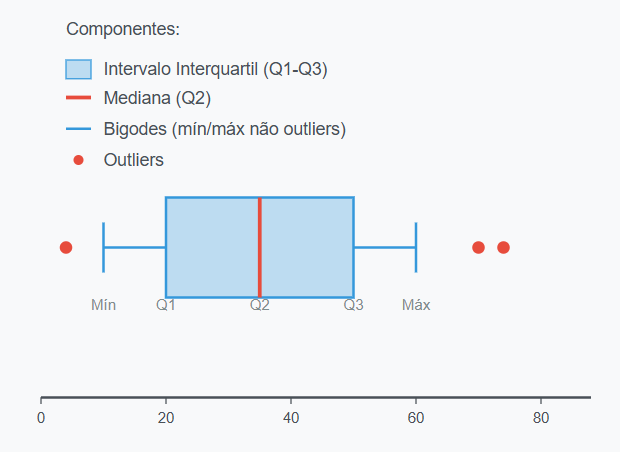

- onde Q1 = 25% dos dados , Q3 = 75% e Q2 sendo a mediana.

- Esses boxplot normalmente são plotados utilizando o seaborn

- Boxplot para o consumo de alcool - variavel dependente (Y) do nosso projeto
- as outras variaveis são independentes que contribuem para a função de consumo.

In [231]:
import seaborn as sns

In [232]:
dados = pd.DataFrame(dados) #transforma dados em dataframe
dados.head()

,temp_media,temp_min,temp_max,chuva,fds,consumo
0,27.30,23.9,32.5,0.0,0,25461
1,27.02,24.5,33.5,0.0,0,28972
2,24.82,22.4,29.9,0.0,1,30814
3,23.98,21.5,28.6,1.2,1,29799
4,23.82,21.0,28.3,0.0,0,28900


<Axes: xlabel='consumo'>

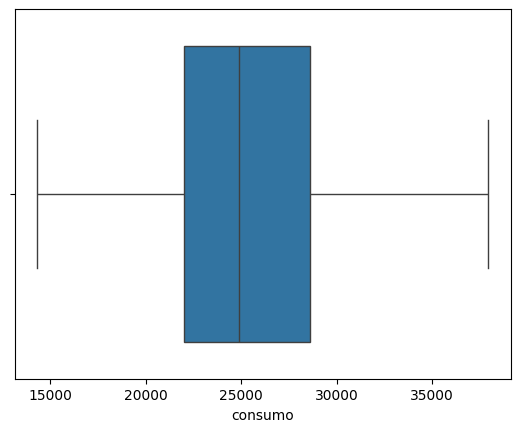

In [233]:
sns.boxplot(data=dados['consumo'],orient= 'h') #o parametro orient h  deixa na horizontal os dados

- Não apresenta outliers.
- Mediana um pouco abaixo do esperado, porem nada tão estranho.

Text(0.5, 0, 'Litros')

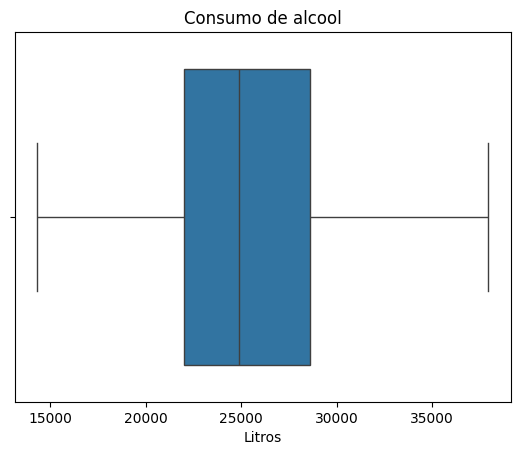

In [234]:
ax = sns.boxplot(data=dados['consumo'],orient= 'h')
ax.set_title('Consumo de alcool')
ax.set_xlabel('Litros')

## 2.3. Boxplot de duas variáveis

----------

- Comparar em boxplots o consumo no fim se semana e sem fim de semana:

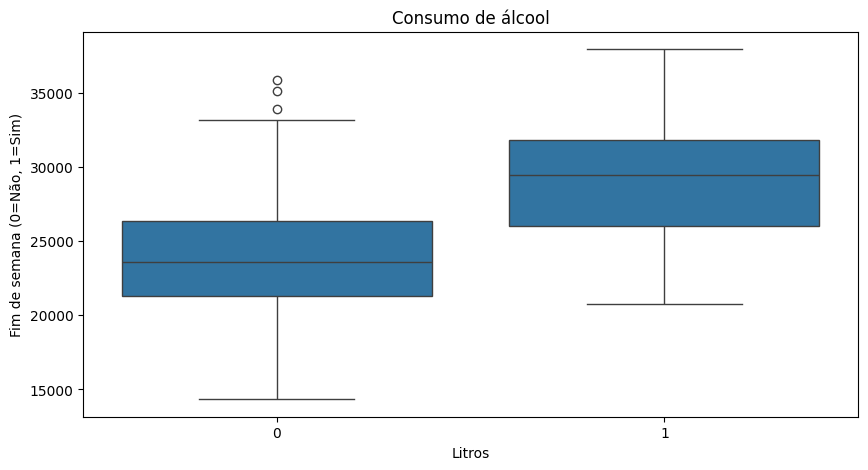

In [235]:
ax = sns.boxplot(x='fds', y='consumo', data=dados, orient='v')
ax.figure.set_size_inches(10,5)
ax.set_title('Consumo de álcool')
ax.set_xlabel('Litros')
ax.set_ylabel('Fim de semana (0=Não, 1=Sim)')  # exemplo se fds for categórica
plt.show()

- vemnos na imagem que com o fim de semana o consumo é bem maior, com a mediana perto de 30k litros enquanto sem fim de semana fica perto de 23k.

- Alguns outliers de altos valores fora de fim de semana (feriados)

In [236]:
dados_filtrados = dados[(dados['fds'] == 0) & (dados['consumo'] > 30000)] #dias da semana com alto consumo (estudar dps)
dados_filtrados.head()

,temp_media,temp_min,temp_max,chuva,fds,consumo
13,25.96,21.3,34.0,1.6,0,31825
19,27.68,23.3,35.6,0.6,0,35127
33,23.16,18.0,31.1,1.6,0,31655
63,24.42,19.7,31.6,0.0,0,30300
110,22.52,19.3,29.0,0.0,0,31108


## 2.4. Distribuição de Frequências
-----------

- verificando se comporta com distribuição normal.

-  verificando visualmente (grafico) apartir dos dados de consumo:

/tmp/ipython-input-3691013163.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['consumo'])


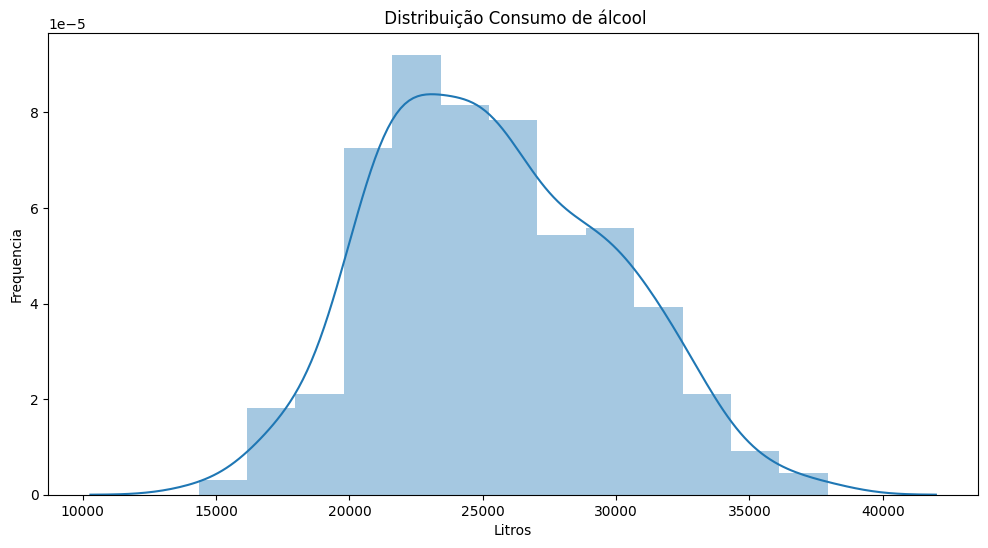

In [237]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title(' Distribuição Consumo de álcool')
ax.set_xlabel('Litros')
ax.set(xlabel='Litros', ylabel='Frequencia')
plt.show()

- Apesar da deformação na queda, lembra uma normal.

# 3.Variável dependente vs Variáveis explicativas

-------------

## 3.1 Usando pairplot
----

- todos os tipos de graficos possíveis com base na combinaç~~ao de informações do dataset

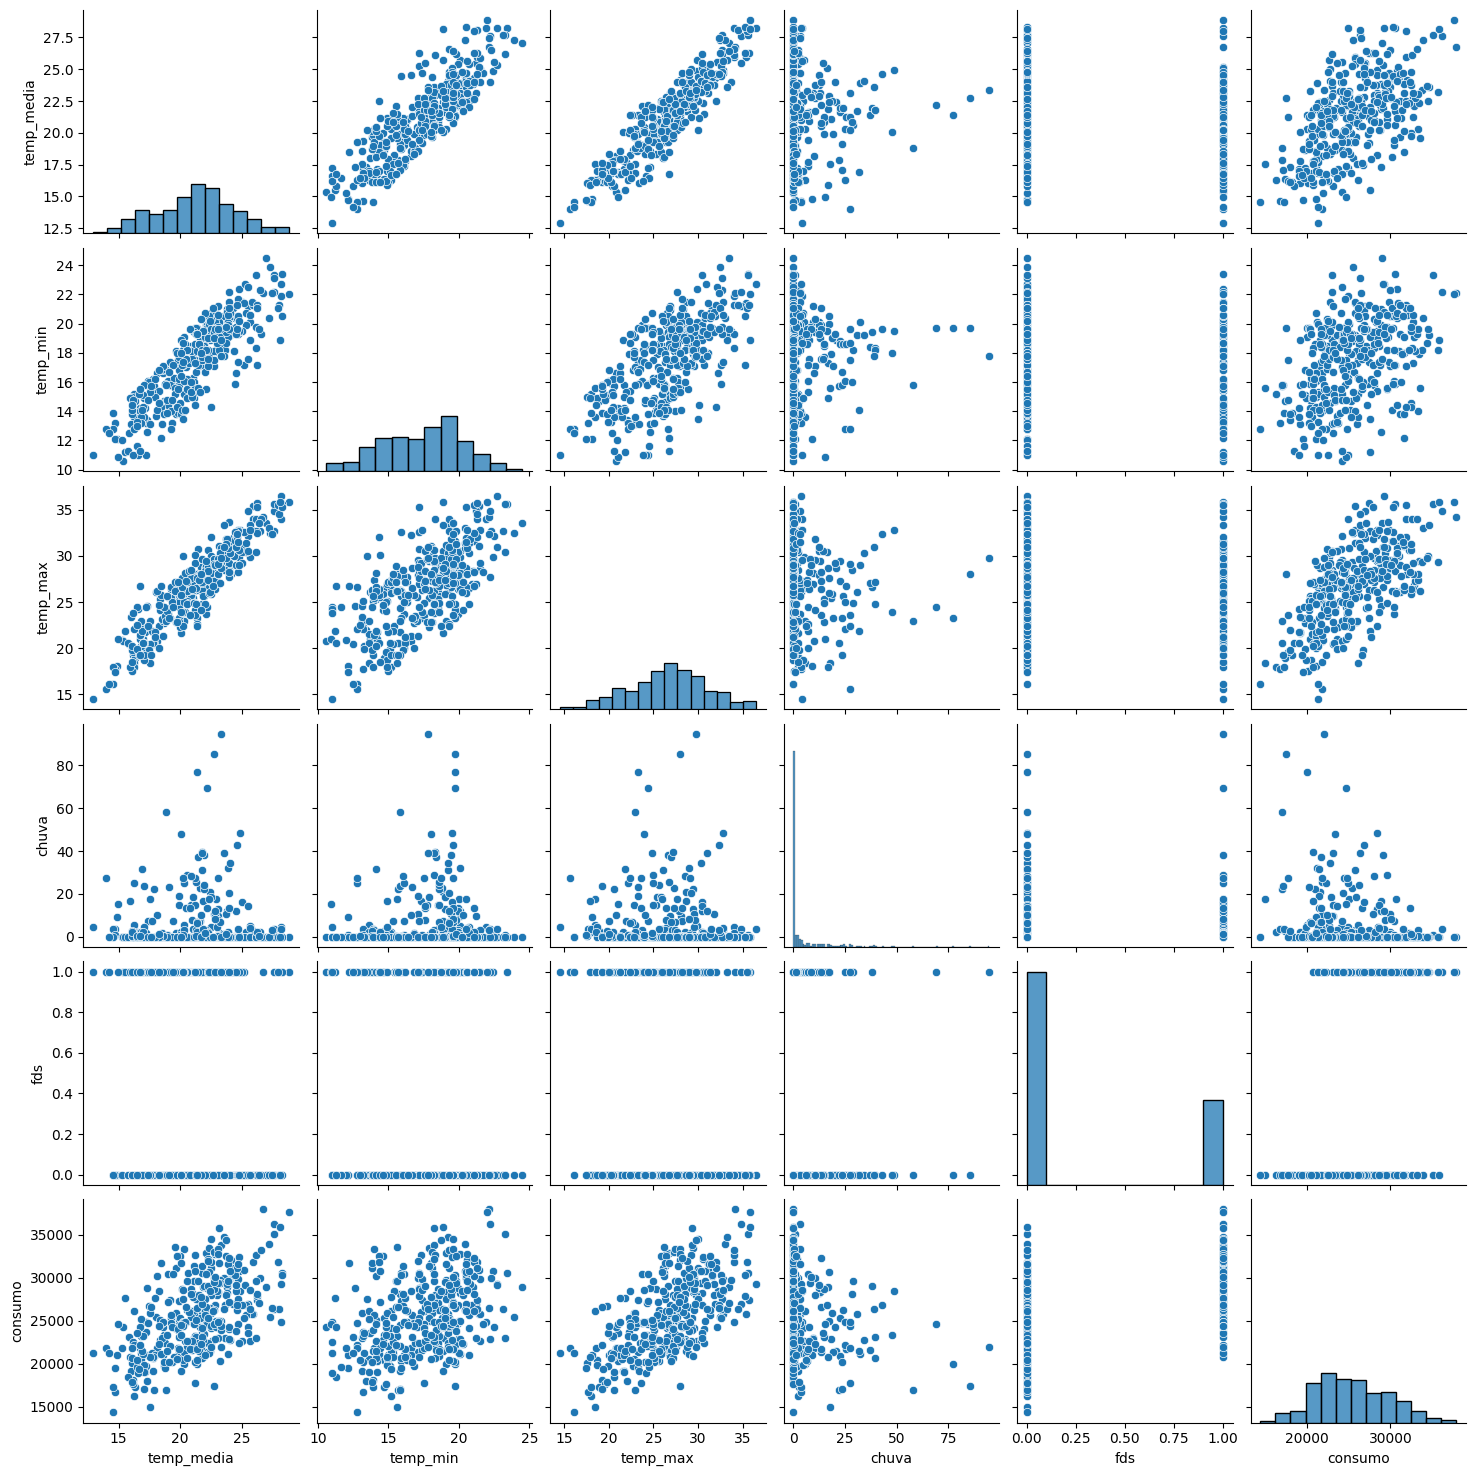

In [238]:
ax = sns.pairplot(dados)

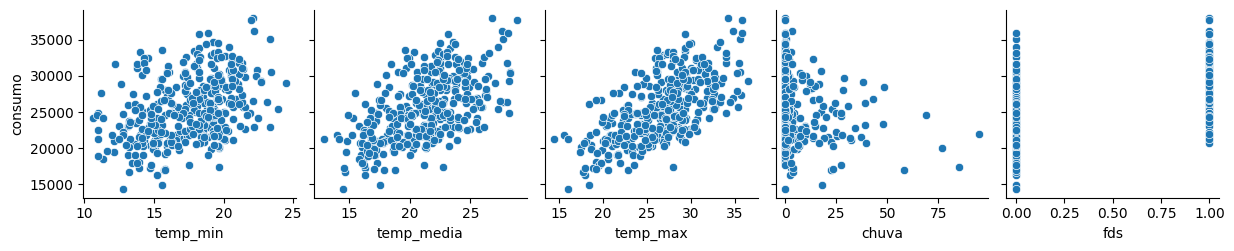

In [239]:
ax = sns.pairplot(dados, y_vars ='consumo', x_vars= ['temp_min','temp_media', 'temp_max', 'chuva','fds'])

- todas as variáveis de acordo com todas as informações que temos.

- vemos que com menos chuva, vende mais cerveja. e tambem temperaturas mais altas tem uma venda maior.

Text(0.5, 1.07, 'Dispersão entre as variáveis')

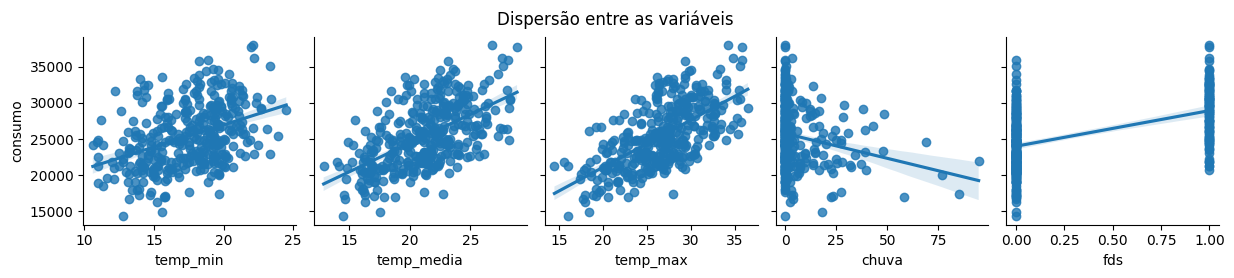

In [240]:
ax = sns.pairplot(dados, y_vars ='consumo', x_vars= ['temp_min','temp_media', 'temp_max', 'chuva','fds'], kind = 'reg')
ax.fig.suptitle('Dispersão entre as variáveis', y=1.07)  # titulo

- mostra a reta de tendencia

## 3.2. Jointplot

------

O jointplot do Seaborn combina em um único gráfico a relação entre duas variáveis numéricas e suas distribuições individuais, permitindo identificar padrões, correlações e comportamento dos dados de forma clara.

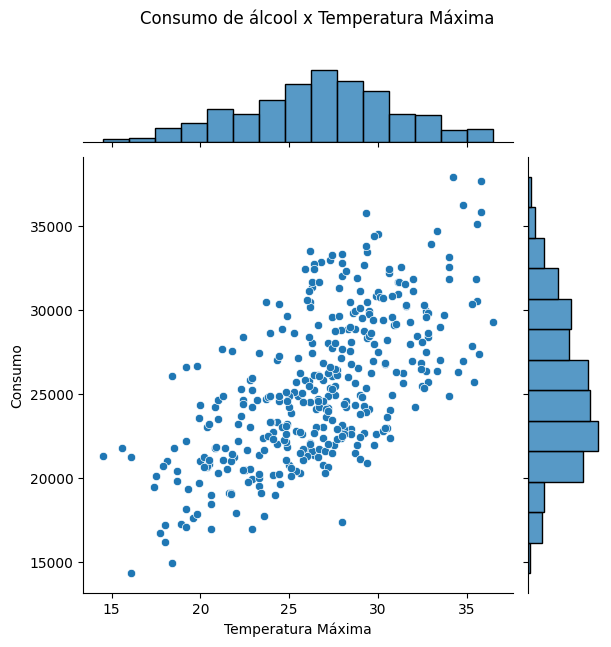

In [241]:
ax = sns.jointplot(x='temp_max', y='consumo', data=dados) #recebe x e y
ax.fig.suptitle('Consumo de álcool x Temperatura Máxima', y=1.07)
ax.set_axis_labels(xlabel='Temperatura Máxima', ylabel='Consumo')
plt.show()

- veemos acima que alem dos gráficos, nas laterais aparecem os gráficos de frequência, mostrando que a maxima de frequência de consumo ficou em algo perto de 25000 litros e a maxima de temperatura algo proximo de 25 graus

- Adicionando a retas de dispersão:

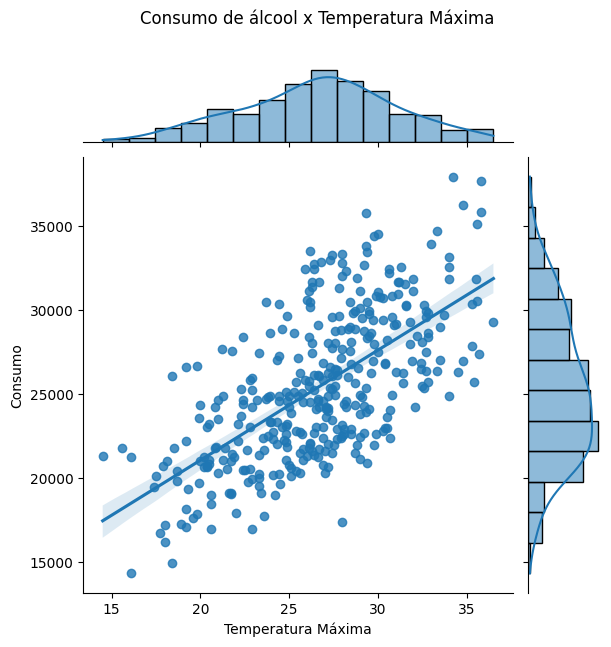

In [242]:
ax = sns.jointplot(x='temp_max', y='consumo', data=dados, kind = 'reg') #recebe x e y
ax.fig.suptitle('Consumo de álcool x Temperatura Máxima', y=1.07)
ax.set_axis_labels(xlabel='Temperatura Máxima', ylabel='Consumo')
plt.show()

## 3.3. Lmplot

-------------------

O lmplot do Seaborn é uma função voltada para visualização de relações lineares entre variáveis, exibindo um gráfico de dispersão junto com uma linha de regressão ajustada automaticamente. Ele é útil para verificar tendências, padrões e possíveis correlações, além de permitir a separação dos dados por categorias com hue, col e row.

Text(0.5, 1.07, 'Consumo de álcool x Temperatura Máxima')

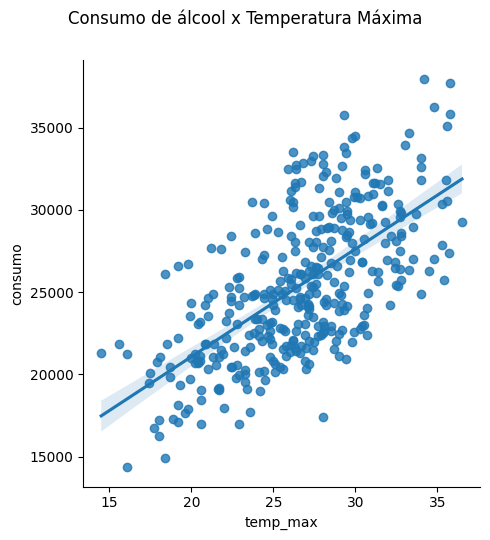

In [243]:
ax = sns.lmplot(x='temp_max', y='consumo', data=dados) #recebe x e y # ja plota direto o gráfico de dispersão
ax.fig.suptitle('Consumo de álcool x Temperatura Máxima', y=1.07)

- Plotando o lmplot com uma terceira variável:

Text(0.5, 1.07, 'Consumo de álcool x Temperatura Máxima x fim de semana')

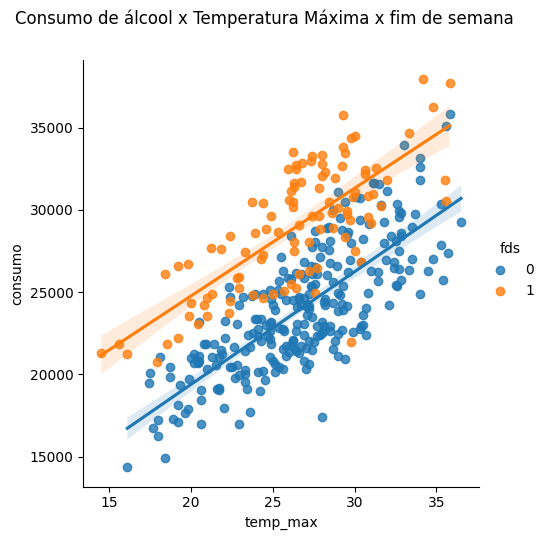

In [244]:
ax = sns.lmplot(x='temp_max', y='consumo', data=dados, hue='fds') #recebe x e y # ja plota direto o gráfico de dispersão
ax.fig.suptitle('Consumo de álcool x Temperatura Máxima x fim de semana', y=1.07)

- alem de plotar o consumo e a temperatura max agora tambem temos duas cores, a laranja representa dados do fim de semana e a azul representa dados do meio de semana, vemos aqui duas retas, a reta superior de dispersao laranja representando o consumo x temperatura maxima no fim de semana e abaixo a reta para meio de semana

- Vemos nesse grafíco uma clara tendência da reta de fim se semana ser maior.

Text(0.5, 1.07, 'Consumo de álcool x Temperatura Máxima x fim de semana')

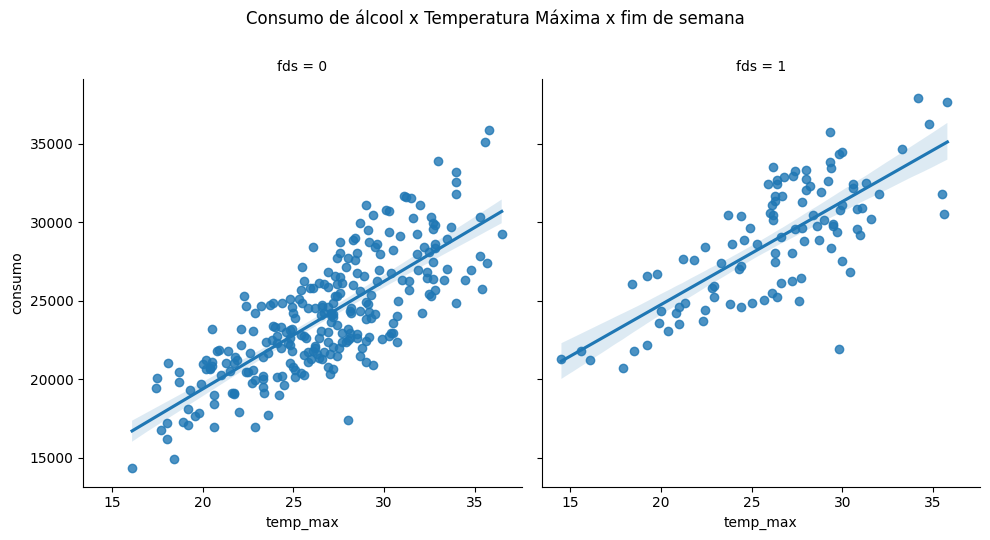

In [245]:
# ax = sns.lmplot(x='temp_max', y='consumo', data=dados, hue='fds') #recebe x e y # ja plota direto o gráfico de dispersão
ax = sns.lmplot(x='temp_max', y='consumo', data=dados, col='fds')
# troncado o parametro hue por col a gente vai ter dois graficos de comportamento, uma para fim de semana e outro para meio de semana
ax.fig.suptitle('Consumo de álcool x Temperatura Máxima x fim de semana', y=1.07)

# 4. Datasets de Treino e teste

----------------

## 4.1 Datasets de treino e teste

--------

- Usaremos a biblioteca Scitkit-learn para prever o modelo de regressão linear.

- ### **preparando o dataset de treino:**

In [246]:
from sklearn.model_selection import train_test_split

- criando uma serie par aarmazenar o consumo de cerveja(y)

In [247]:
y= dados['consumo'] # o y de saida
x = dados[['temp_max','chuva','fds']] # variaveis explicativas armazenados em x

In [248]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3, random_state=42)# irá dividir os dados em dados de treino e dados de teste
# y de teste é influenciado pelo x de teste, assim como o y de treino é influenciado pelo x de treino
# o test_size deixa claro que quero 30% dos dados para teste e 70% para treino.

- test_size -> o usuario escolhe o tamanho dos dados de teste. Normalmente na literatura se considera algo em torno de 20 a 30%

In [249]:
print(x_teste.shape, x_treino.shape)
soma_total = x_teste.shape[0] + x_treino.shape[0]
print(soma_total)

(110, 3) (255, 3)
365


In [250]:
110/365  #exatamente os 30 previsto

0.3013698630136986

## 4.2. Estimando um modelo de regressão linear

------

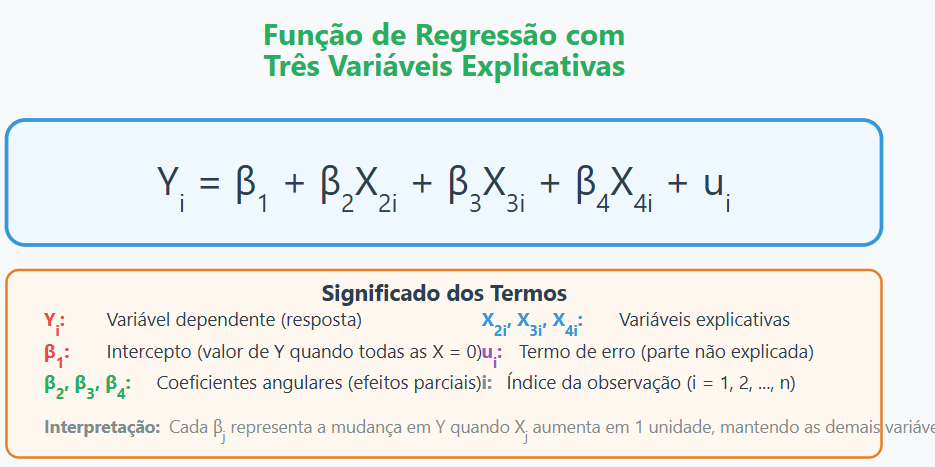

In [251]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics #para as metricas do modelo

In [252]:
modelo = LinearRegression()

- para treinar um modelo, usa-se o fit

In [253]:
modelo.fit(x_treino, y_treino )#treino do modelo

LinearRegression()

- Obter o r2 atraves do modelo treinado:

In [254]:
format(modelo.score(x_treino, y_treino))

'0.7051672701607923'

- o modelo apresenta um r2 de 0.70, lembrando que ele é dado em uma escala de 0 a 1. Modelo consideravel razoavel apartir de poucos dados

- ### **Gerando previsoes paras os daods de teste aparitr dos dados acima**

In [255]:
y_previsto = modelo.predict(x_teste) #aplica o x teste conforme o modelo treinado para prever o y_previsto
y_previsto

array([25554.14149914, 27071.30999093, 28118.12710588, 21615.74404633,
       27324.62466916, 17734.21626633, 22483.52653593, 18878.89157912,
       18051.33299841, 20881.46655513, 32152.10510847, 26889.19148314,
       25240.55057901, 25848.54213308, 20614.45655833, 22350.02153753,
       28090.73646874, 27092.8413556 , 24686.35900953, 28886.53836572,
       34560.50079774, 22016.25904153, 29707.79574445, 19261.00071033,
       25014.89341212, 24819.86400793, 29220.30086173, 29959.80644634,
       22871.20825939, 24219.09151513, 24450.55214205, 29887.82585373,
       28224.24146714, 32555.70398611, 23618.31902233, 27284.47838492,
       27489.96397594, 23627.57066967, 25020.12150553, 31623.39083293,
       27890.47897114, 32290.91582493, 27941.3919408 , 24547.62591772,
       24816.14894643, 31756.89583133, 24753.11150873, 24797.0144727 ,
       26108.38888107, 29231.64090758, 29220.30086173, 31777.12321966,
       31756.89583133, 33959.72830493, 20347.44656153, 25821.15149594,
      

- Obtendo r2 das previsoes do modelo conforme o treinamento:

In [256]:
metrics.r2_score(y_teste, y_previsto) # o teste é o "gabarito" do valores valores reais
# ja o previsto é quanto o o modelo achou de fato

0.7487244453450828

- vemos uma acuracia de 74.87% entre o modelo de teste e o previsto

- O quanto da variação final do modelo foi explicado pelas explicativas

- Calculo feito:

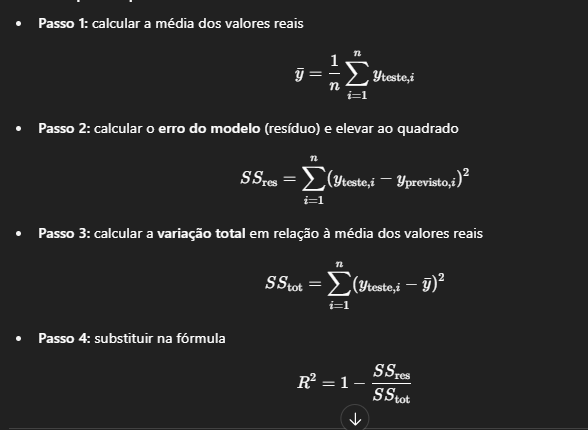

## 4.3. Obtendo previsões pontuais
--------------

- Fazendo previsoes em momentos especificos

In [257]:
dado_entrada = x_teste[0:1] # primeiro dado do dataset de teste
dado_entrada

,temp_max,chuva,fds
193,28.7,0.0,0


In [258]:
modelo.predict(dado_entrada)[0] # O modelo previu 25554 l de cerveja conforme dado de entrada qeu enviei.

np.float64(25554.14149913581)

- Criando um simulador simples, onde o usuario coloca a temperatura maxima, a quantidade de chuva, se foi em fim de semana ou e nao e o modelo calcula automaticamente um valor de litros que teve no dia

In [259]:
temp_max = 35
chuva = 11
fds = 1

entrada = [[temp_max, chuva, fds]]
modelo.predict(entrada)[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(34510.89180441848)

## 4.4.Coeficientes estimados

----

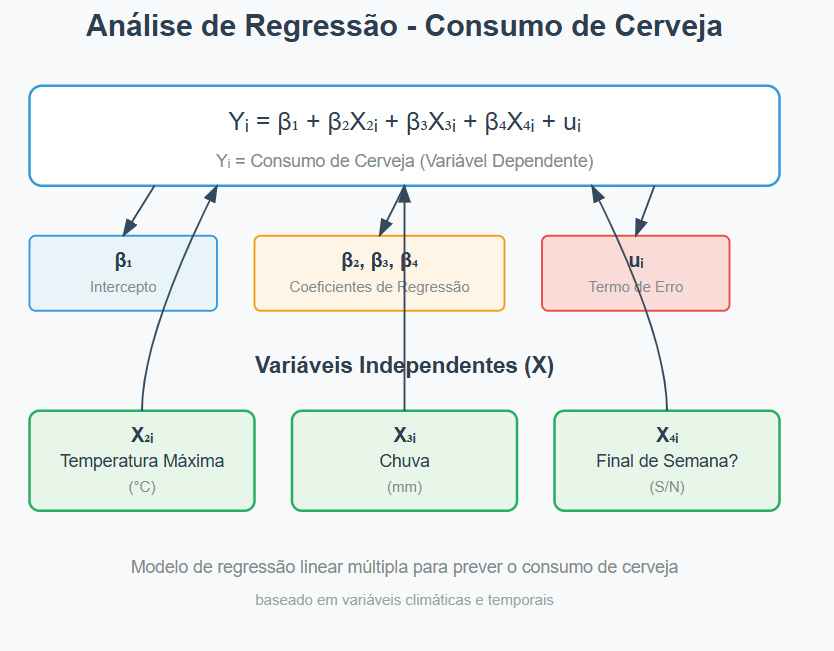

In [260]:
modelo.coef_ #os coeficientes angulares do modelo

array([ 667.524992  ,  -53.05718063, 5334.97184259])

In [261]:
modelo.intercept_

np.float64(6396.1742286972585)

In [262]:
index = [ 'intercepto', 'Temperatura Máxima', 'Chuva(mm)', 'Final de semana']
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_),index = index, columns = ["Parâmetros"])

,Parâmetros
intercepto,6396.174229
Temperatura Máxima,667.524992
Chuva(mm),-53.057181
Final de semana,5334.971843


### 1. **Intercepto (β₁ = 6396.17 litros)**
- **Significado:** Consumo base quando todas as variáveis são zero
- **Interpretação:** Mesmo com temperatura 0°C, sem chuva e em dia de semana, o consumo esperado é de **6396 litros**
- **Influência:** Representa o consumo mínimo do sistema

### 2. **Temperatura Máxima (β₂ = 667.52 litros/°C)**
- **Significado:** Impacto da temperatura no consumo
- **Interpretação:** Para cada **1°C de aumento** na temperatura máxima:
  - Consumo **aumenta 667.52 litros**
  - Exemplo: Se a temperatura sobe de 25°C para 30°C (+5°C), o consumo aumenta em **3337.6 litros**
- **Influência:** **Positiva e forte** - dias mais quentes aumentam significativamente o consumo

### 3. **Chuva (β₃ = -53.06 litros/mm)**
- **Significado:** Impacto da precipitação no consumo
- **Interpretação:** Para cada **1mm de chuva adicional**:
  - Consumo **diminui 53.06 litros**
  - Exemplo: Se chove 10mm, o consumo reduz em **530.6 litros**
- **Influência:** **Negativa** - chuva desestimula o consumo de cerveja

### 4. **Final de Semana (β₄ = 5334.97 litros)**
- **Significado:** Efeito de ser final de semana
- **Interpretação:** Quando é final de semana (Sim=1):
  - Consumo **aumenta 5334.97 litros** em relação aos dias de semana
  - Exemplo: Um sábado com mesma temperatura e chuva que uma segunda-feira terá **5335 litros a mais** de consumo
- **Influência:** **Positiva e muito forte** - o maior fator isolado de aumento no consumo

---

## 📊 Resumo de Impactos

| Variável | Coeficiente | Efeito no Consumo | Força do Impacto |
|----------|-------------|-------------------|------------------|
| Intercepto | 6396.17 | Base fixa | - |
| Temperatura | +667.52 | Aumenta | Alta |
| Chuva | -53.06 | Diminui | Moderada |
| Final Semana | +5334.97 | Aumenta | Muito Alta |


## 4.4. Análises gráficas das previsões

----------------

- Gerando as previsões para o modelo de treino

In [263]:
y_previsto_treino = modelo.predict(x_treino)

- Plota o previso no eixo x e o que é real no eixo y

[Text(0.5, 0, 'Previsao'), Text(0, 0.5, 'Real')]

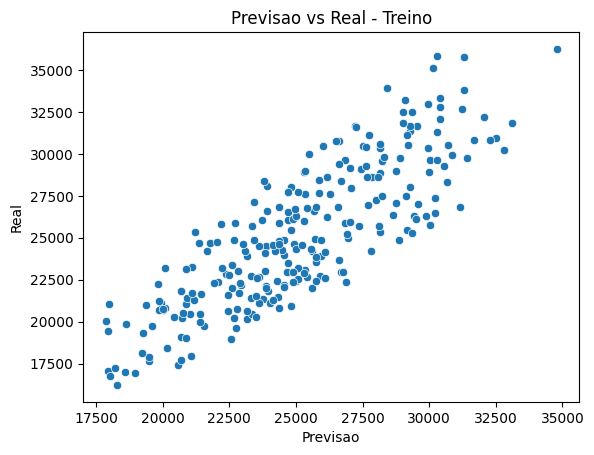

In [264]:
ax = sns.scatterplot(x = y_previsto_treino, y = y_treino )
ax.set_title("Previsao vs Real - Treino")
ax.set(xlabel = "Previsao", ylabel = "Real")

In [265]:
residuo = y_treino - y_previsto_treino

[Text(0.5, 0, 'Previsao'), Text(0, 0.5, 'Residuos')]

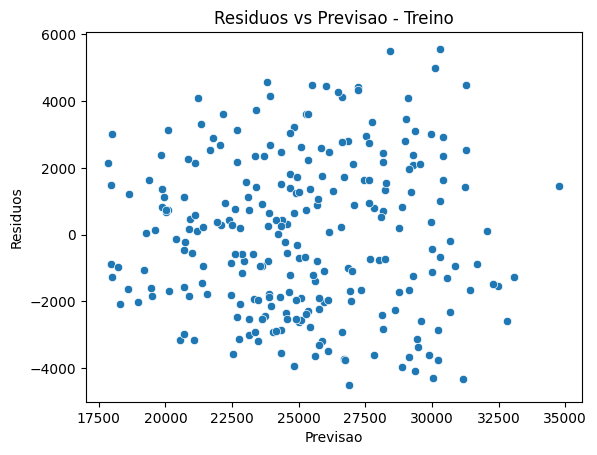

In [266]:
ax = sns.scatterplot(x = y_previsto_treino, y = residuo )
ax.set_title("Residuos vs Previsao - Treino")
ax.set(xlabel = "Previsao", ylabel = "Residuos")


-  Neste  grafico conseguimos ver o residuo (diferença entre previsto e real) (erro) e quais os pontos que tem maior erro.

- Os maiores erros se concentram acima de 25000 litros de cerva até proximo de 30000.

- Para retirar a facilitar a leitura, e tirar os valores negativos, basta elevar ao quadrado o resíduo.

[Text(0.5, 0, 'Previsao'), Text(0, 0.5, 'Residuos**2')]

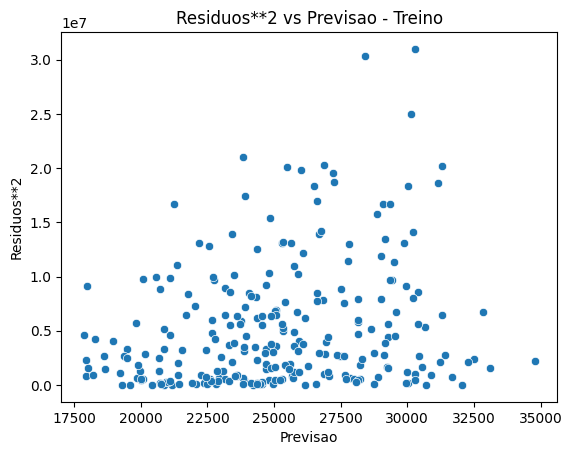

In [267]:
ax = sns.scatterplot(x = y_previsto_treino, y = residuo **2 )
ax.set_title("Residuos**2 vs Previsao - Treino")
ax.set(xlabel = "Previsao", ylabel = "Residuos**2")

- Fica mais facil para ver onde se encontra os maiores eerros, onde a maioria se encontra entre 27500 e 30000 litros

- modelos de gráficos mais comuns :

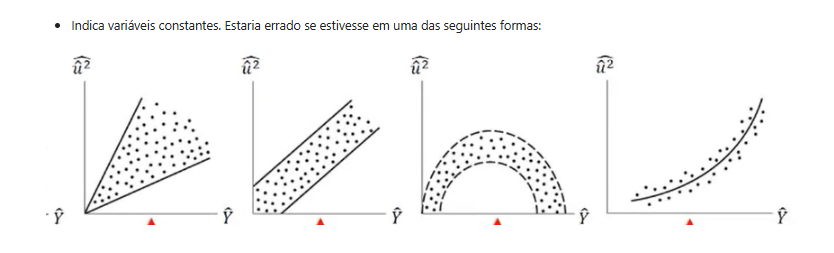

- O acima indica fortes evidencia de heterocedasticidade nos dados.

- No contexto de regressão, heterocedasticidade significa que a variância dos erros (resíduos) não é constante ao longo de todos os valores previstos ou ao longo das variáveis independentes.

- **Distribuição dos resíduos**

/tmp/ipython-input-3638837227.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo,bins = 100)


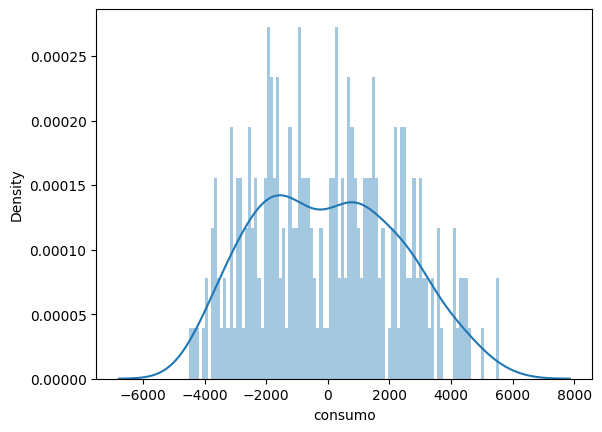

In [268]:
ax = sns.distplot(residuo,bins = 100)

- comportamento um pouco diferente de uma normal

# 5. Comparando os modelos

-----

## 5.1. Comparando os modelos

------------------------

- **Estimando um novo modelo com temperatura maxima e media como explicativas**

In [269]:
Entrada_x2 = dados[['temp_media', 'chuva','fds']]

In [270]:
x2_teste, x2_treino, y2_teste, y2_treino = train_test_split(Entrada_x2, y, test_size = 0.3, random_state = 42)
# o dataset de y (saida) permanece o mesmo, so mudei a entra de x para com os novos dados

In [271]:
modelo_2 = LinearRegression()

In [272]:
modelo_2.fit(x2_treino, y2_treino) # treinar com os dados _2 de treino (x e y)

LinearRegression()

- **Modelo com temperatura média (treino)**

In [273]:
modelo_2.score(x2_treino,y2_treino)

0.6754197395537165

- **Modelo com temperatura máxima(treino)**

In [274]:
modelo.score(x_treino, y_treino)

0.7051672701607923

- Comparando os dois modelos vemos que com a temperatura o modelo explica melhor a variabilidade dos dados.

- O modelo 1 consegue explicar mais quanto da diferença entre os valores de Y pode ser prevista pelas variáveis X.

In [275]:
y_previsto = modelo.predict(x_teste)
y_previsto2 = modelo_2.predict(x2_teste)

- **R2 para o modelo com temperatura média(Previsao)**

In [277]:
metrics.r2_score(y2_teste,y_previsto2) #previsto e real

0.6485616292483751

- **R2 para o modelo com temperatura máxima(Previsao)**

In [278]:
metrics.r2_score(y_teste, y_previsto) #previsto e real

0.7487244453450828

- vemos uma diferença maior ianda, mostrando que o modelo 1 explica melhor a variação

## 5.2. Outras metricas de regressão

-------------

- **Erro quadrático Médio**

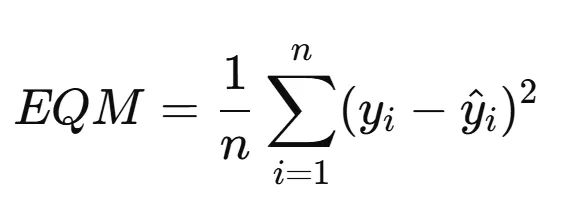

- Quanto menor o valor, Melhor o ajuste do modelo

- **Raiz do Erro Quadrático Médio**

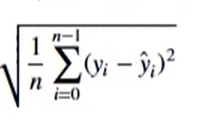

- Quanto menor o valor, melhor o ajuste do modelo

- **Para modelo com temperatura média**

In [288]:
EQM_2 = (((y2_teste - y_previsto2)**2).sum()) / (len(y2_teste))
print(EQM_2)
Raiz_EQM_2 = np.sqrt(EQM_2)
print(Raiz_EQM_2)

6328493.2282382315
2515.649663255643


- direto via python:

In [289]:
EQM_2 = metrics.mean_squared_error(y2_teste, y_previsto2)
print(EQM_2)
Raiz_EQM_2 = np.sqrt(EQM_2)
print(Raiz_EQM_2)

6328493.2282382315
2515.649663255643


- **Para modelo com temperatura máxima:**

In [290]:
EQM_2 = metrics.mean_squared_error(y_teste, y_previsto)
print(EQM_2)
Raiz_EQM_2 = np.sqrt(EQM_2)
print(Raiz_EQM_2)

5480853.45961266
2341.122264985889


- Quanto menor o valor do EQM_2 e de sua raiz, melhor vai ser a adaptação dos modelos.

- Logo pelo que vemos acima, o modelo com a temperatura máxima está mais bem adaptado.